# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [121]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [3]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [122]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [123]:
ratings = ratings.drop(['user'], axis=0)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

In [124]:
print(f'{ratings.shape[0]} rows')

1000 rows


Заполните пропуски нулями.

In [125]:
ratings.fillna(0, inplace=True)

Нормализуйте данные при помощи `normalize`.

In [126]:
from sklearn.preprocessing import normalize

ratings_norm = normalize(ratings, axis=0)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings_norm)

KMeans(n_clusters=5)

In [134]:
kmeans.labels_

array([4, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3,
       0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 2, 2, 0, 0, 3, 0,
       3, 3, 3, 3, 0, 2, 2, 3, 0, 3, 3, 2, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 2, 2, 3, 0, 0, 3, 3, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Выведите на экран центры кластеров (центроиды)

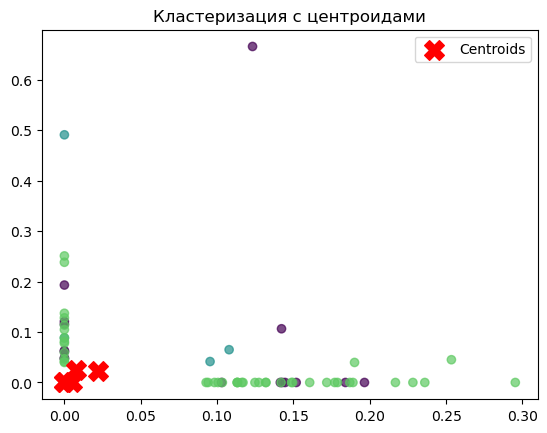

In [136]:
# Получение центроидов
centroids = kmeans.cluster_centers_

# Визуализация данных и центроидов
plt.scatter(ratings_norm[:, 0], ratings_norm[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Кластеризация с центроидами')
plt.legend()
plt.show()

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [137]:
from scipy.spatial import distance

# Вычисление косинусного расстояния
cosine_distance = distance.cosine(ratings.loc['the beatles'], ratings.loc['coldplay'])

# Вывод ответа
print(f"Косинусное расстояние между 'the beatles' и 'coldplay': {round(cosine_distance, 2)}")

Косинусное расстояние между 'the beatles' и 'coldplay': 0.9


Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [138]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [140]:
ratings['Cluster'] = kmeans.fit_predict(ratings_norm)
# Вычисление центроидов для каждого кластера
centroids = {}
for cluster_label in range(5):
    cluster_points = ratings[ratings['Cluster'] == cluster_label].iloc[:, :-1]  # Исключаем столбец с метками кластера
    centroids[cluster_label] = np.mean(cluster_points, axis=0)

# Функция pClosest
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: distance.cosine(x[1], pt))]
    return ind[:K]

# Вывод топ-10 исполнителей для каждого кластера
for cluster_label, centroid in centroids.items():
    # Индексы топ-10 ближайших исполнителей
    top_indices = pClosest(ratings.iloc[:, :-1].values, centroid, K=10)
    
    # Имена топ-10 исполнителей
    top_artists = ratings.index[top_indices].tolist()
    
    # Вывод результатов
    print(f'Top-10 исполнителей для кластера {cluster_label}: {top_artists}')


Top-10 исполнителей для кластера 0: ['niИ', 'tйlйpopmusik', 'marilyn manson', 'kmfdm', 'tool', 'perfect circle', 'deftones', 'koЯn', 'radiohead', 'the smashing pumpkins']
Top-10 исполнителей для кластера 1: ['the beatles', 'john lenon', 'led zeppelin.', 'simon and garfunkel', 'the rolling stones', 'dylan. bob', 'pink fluid', 'who', 'radiohead', 'queen']
Top-10 исполнителей для кластера 2: ['deathcab for cutie', 'the postal service', 'the shins', 'bright eyes', 'coldplay', 'sufjan stevens', 'ironand wine', 'jimmy eat world', 'dashboard confesssional', 'the decemberists']
Top-10 исполнителей для кластера 3: ['sufjan stevens', 'ironand wine', 'the arcade fire', 'the shins', 'andrew bird', 'the decemberists', 'deathcab for cutie', 'beirut', 'belle and sebastian', 'radiohead']
Top-10 исполнителей для кластера 4: ['radiohead', 'the beatles', 'deathcab for cutie', 'coldplay', 'the shins', 'modest mouse', 'the arcade fire', 'sufjan stevens', 'kanye west', 'the killers']


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

**Ответ:**
Кластеры осмысленные (каждый кластер можно отнести к некоторому музыкальному жанру)

Кластеры выделяются неплохо, но с погрешностями (жанры иногда плохо угадываются)

# Часть 2: сравнение алгоритмов кластеризации

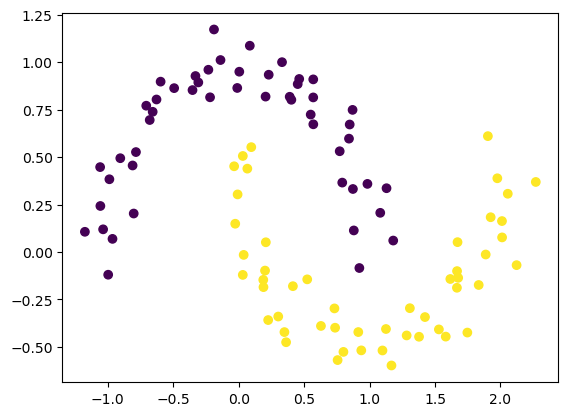

In [102]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

C:\Users\админ\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\админ\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


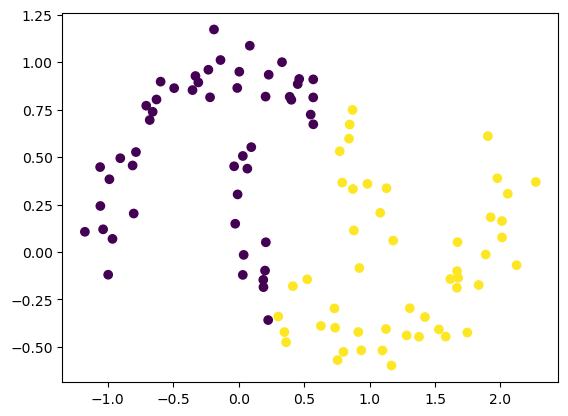

In [82]:
kmeans = KMeans(n_clusters=2)
X_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=X_kmeans)

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

ValueError: num must be an integer with 1 <= num <= 24, not 26

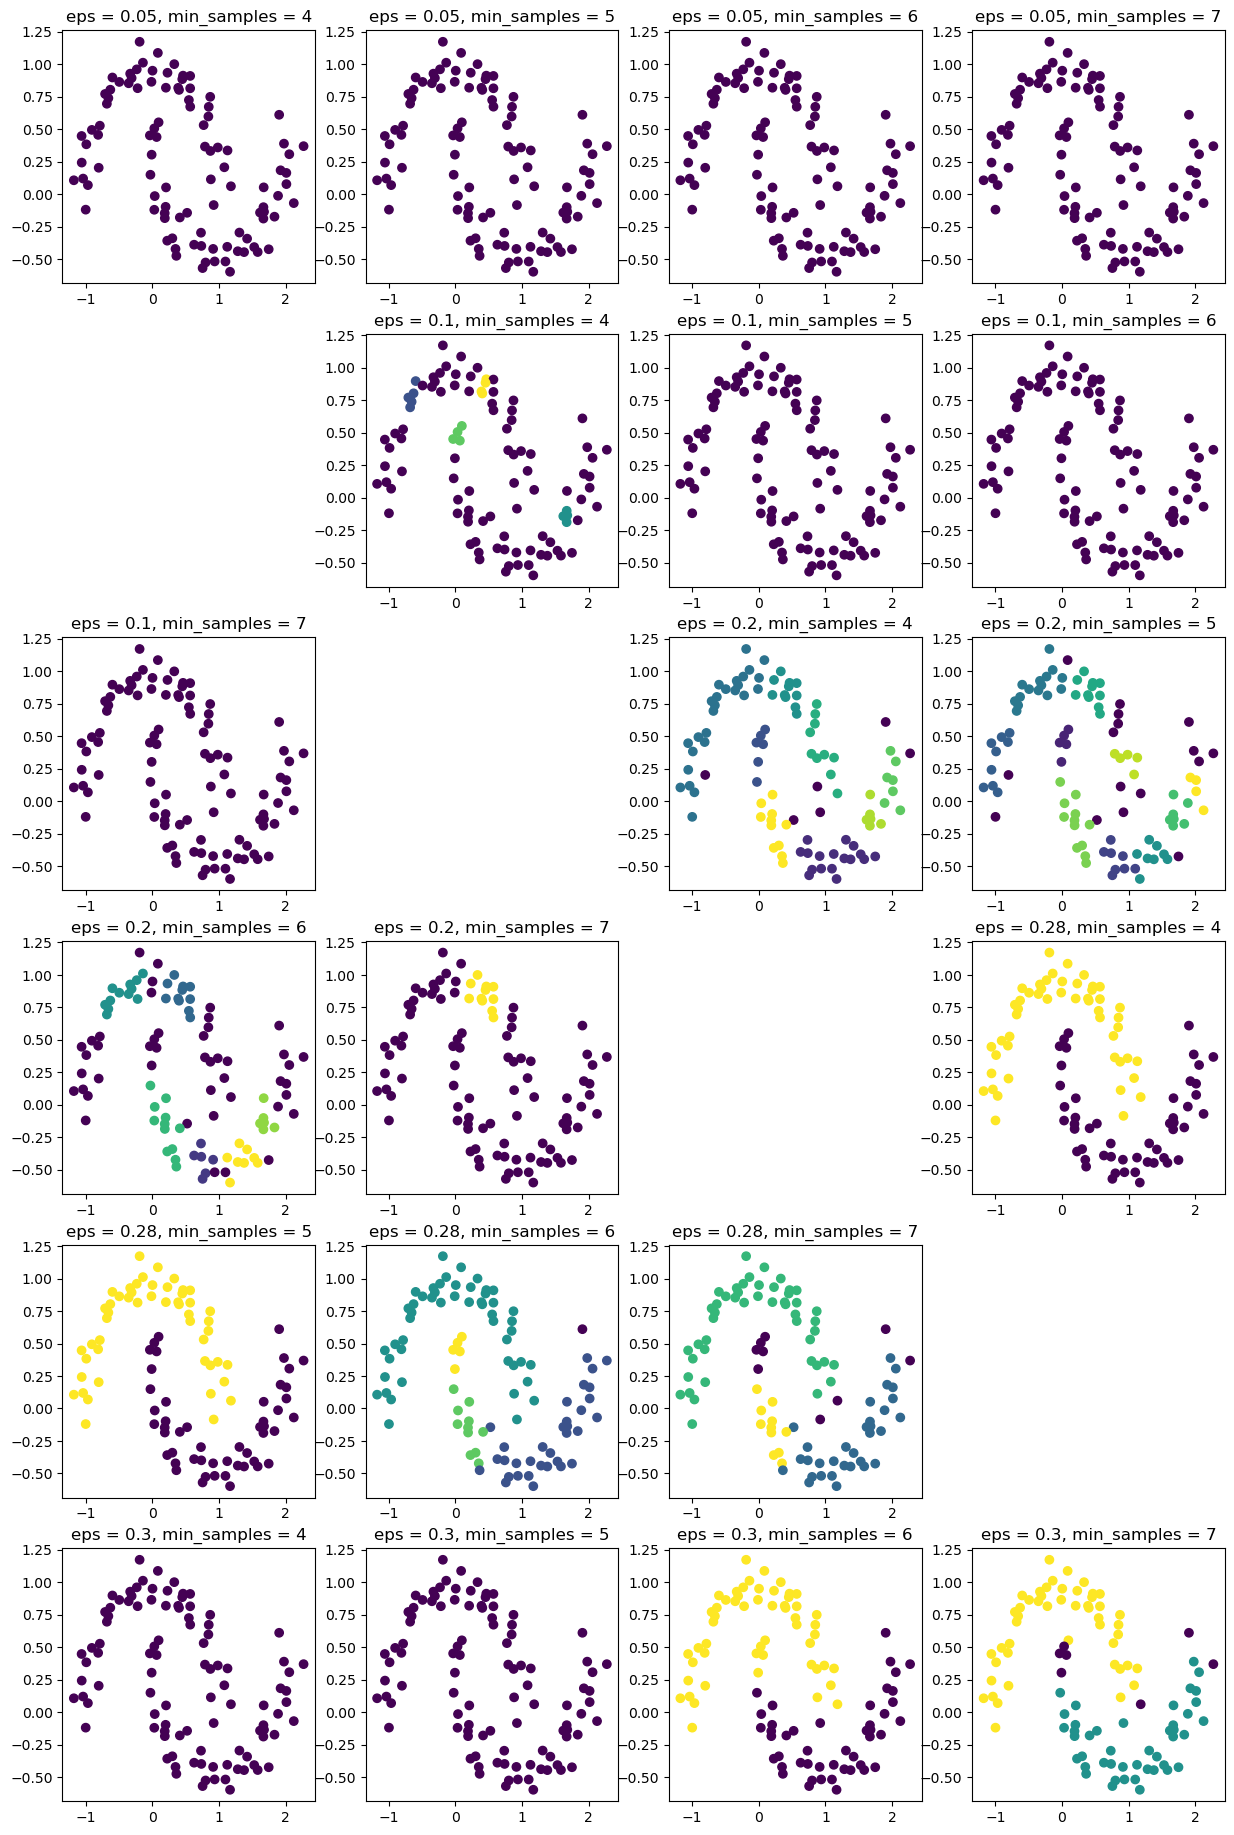

In [91]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
    for min_samples in [4, 5, 6, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan = dbscan.fit_predict(X)
        plt.subplot(6, 4, i)
        plt.scatter(X[:,0], X[:,1], c=y_dbscan)
        plt.title('eps = {}, min_samples = {}'.format(eps, min_samples))
        i += 1
    i+=1
    
plt.show()        

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

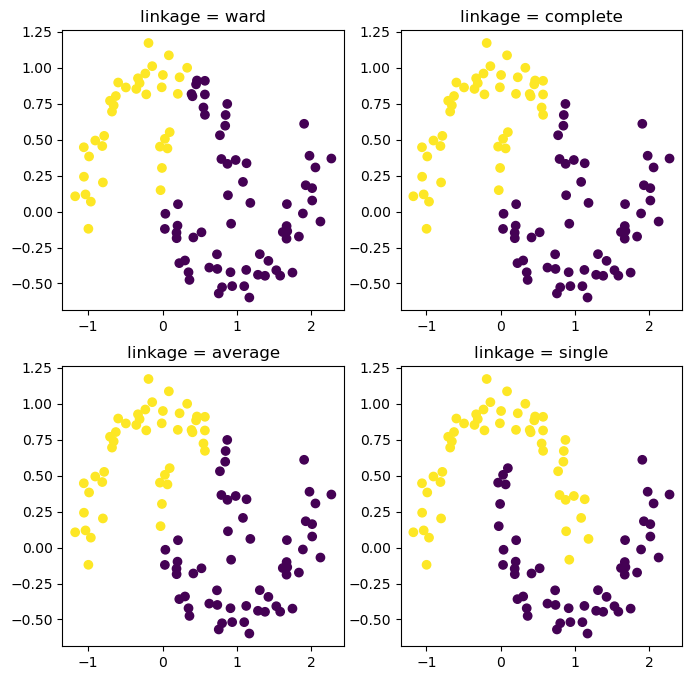

In [107]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize= (8, 8))
i = 1
for linkage in ['ward', 'complete', 'average', 'single']:
    AggCluster = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    y_agg = AggCluster.fit_predict(X)
    plt.subplot(2, 2, i)
    plt.scatter(X[:,0], X[:,1], c=y_agg)
    plt.title('linkage = {}'.format(linkage))
    i += 1
i+=1
    
plt.show()     

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

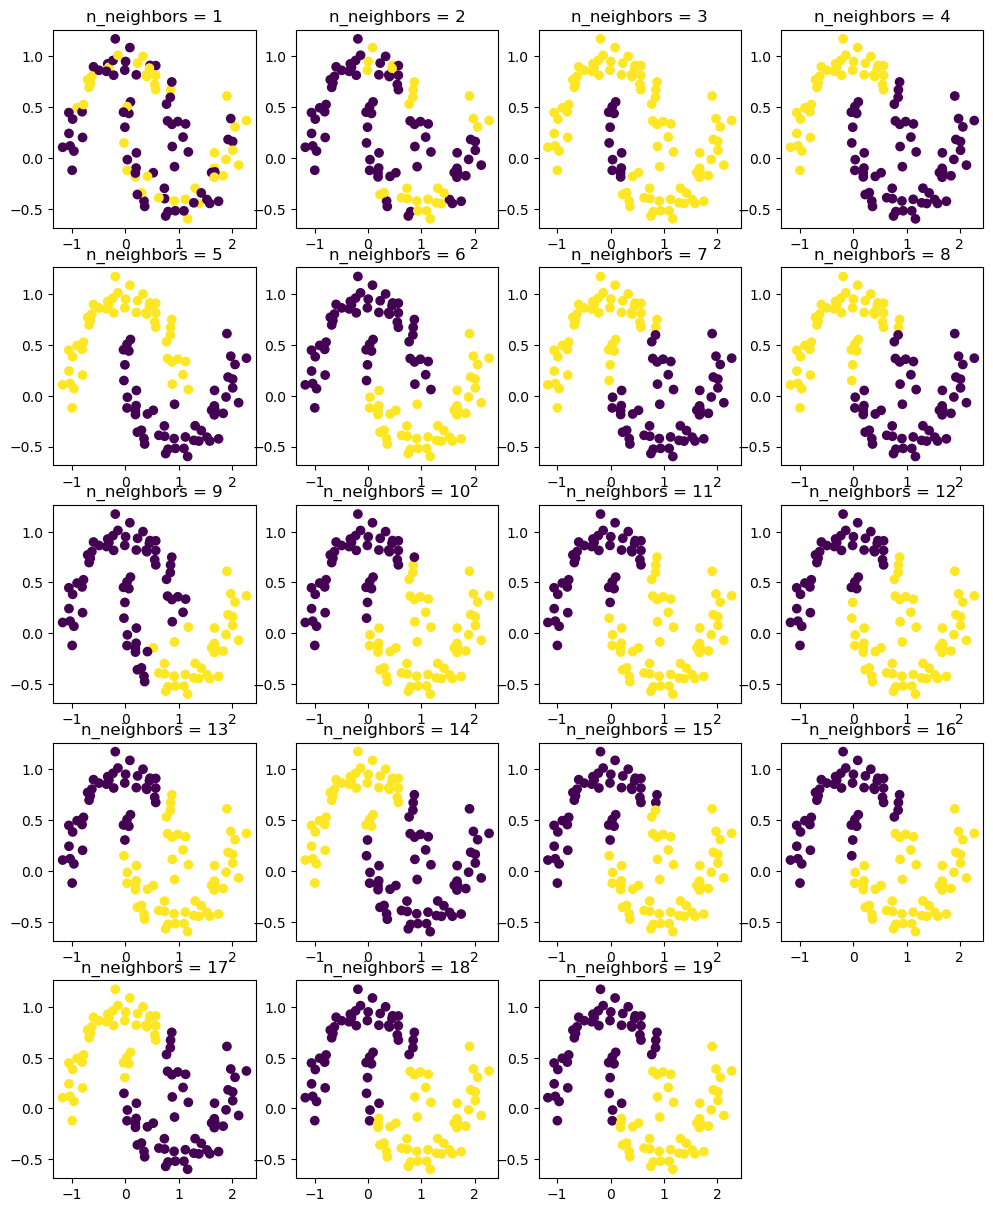

In [115]:
from sklearn.cluster import SpectralClustering

plt.figure(figsize= (12, 18))
i = 1
for n_neighbors in range(1, 20):
    SpectCluster = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42, n_neighbors=n_neighbors)
    y_spect = SpectCluster.fit_predict(X)
    plt.subplot(6, 4, i)
    plt.scatter(X[:,0], X[:,1], c=y_spect)
    plt.title('n_neighbors = {}'.format(n_neighbors))
    i += 1
i+=1
    
plt.show()   
    

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

Хорошо отработали методы: SpectralClustering, AgglomerativeClustering, DBSCAN
На данном датасете все методы отработали с +- одинаковой скоростью.